In [31]:
import analysis as ana
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import importlib as ilb
ilb.reload(ana)
%matplotlib inline

INFO: log version >= 3 (after 2016-9-1), use storm102 log structure
INFO: log version >= 4 (after 2016-9-14), remove scale stage from topologies
INFO: log version >= 5 (after 2016-9-25), enable gpu log


# Multiple Stream Experiments

## 2016-9-22

Run captioner with 1, 2, 3, ..., 10 video streams. Configurations are as follow

__Num of Stream: 1__

InputFiles = [
"/home/peifeng/work/data/The_Nut_Job_trailer.mp4"
]

- captioning-1: batch-size=60, vgg=1 GPU, captioner=1 GPU, timer=nano, num-workers=1
- captioning-2: batch-size=60, vgg=1 GPU, captioner=1 GPU, timer=nano, num-workers=1
- captioning-3: batch-size=60, vgg=1 GPU, captioner=1 GPU, timer=nano, num-workers=1
- captioning-4: batch-size=60, vgg=1 GPU, captioner=1 GPU, timer=nano, num-workers=1
- captioning-5: batch-size=60, vgg=1 GPU, captioner=1 GPU, timer=nano, num-workers=1

## 2016-9-24

__Num of Stream: 2__

InputFiles = [
"/home/peifeng/work/data/The_Nut_Job_trailer.mp4",
"/home/peifeng/work/data/The_Nut_Job_trailer.mp4"
]

- captioning-1: batch-size=60, vgg=1 GPU, captioner=2 GPU, timer=nano, num-workers=1
- captioning-2: batch-size=60, vgg=1 GPU, captioner=2 GPU, timer=nano, num-workers=1
- captioning-3: batch-size=60, vgg=1 GPU, captioner=2 GPU, timer=nano, num-workers=1
- captioning-4: batch-size=60, vgg=1 GPU, captioner=2 GPU, timer=nano, num-workers=1
- captioning-5: batch-size=60, vgg=1 GPU, captioner=2 GPU, timer=nano, num-workers=1

...

__Num of Stream: 10__

InputFiles = ["/home/peifeng/work/data/The_Nut_Job_trailer.mp4"] * 10

- captioning-41: batch-size=60, vgg=1 GPU, captioner=3 GPU, timer=nano, num-workers=1
- captioning-42: batch-size=60, vgg=1 GPU, captioner=3 GPU, timer=nano, num-workers=1
- captioning-43: batch-size=60, vgg=1 GPU, captioner=3 GPU, timer=nano, num-workers=1
- captioning-44: batch-size=60, vgg=1 GPU, captioner=3 GPU, timer=nano, num-workers=1
- captioning-45: batch-size=60, vgg=1 GPU, captioner=3 GPU, timer=nano, num-workers=1

### A taste of one stream data

In [18]:
%%capture
ilb.reload(ana)
ana.global_perBatch = False
cap_mul_s1 = ana.cross_res(*['2016-9-22/captioning-{}'.format(idx) for idx in [1, 2, 3, 4, 5]])

INFO: log version >= 4 (after 2016-9-14), remove scale stage from topologies
INFO: log version >= 4 (after 2016-9-14), remove scale stage from topologies
INFO: log version >= 4 (after 2016-9-14), remove scale stage from topologies
INFO: log version >= 4 (after 2016-9-14), remove scale stage from topologies
INFO: log version >= 4 (after 2016-9-14), remove scale stage from topologies
INFO: log version >= 4 (after 2016-9-14), remove scale stage from topologies
INFO: log version >= 4 (after 2016-9-14), remove scale stage from topologies
INFO: log version >= 4 (after 2016-9-14), remove scale stage from topologies
INFO: log version >= 4 (after 2016-9-14), remove scale stage from topologies
INFO: log version >= 4 (after 2016-9-14), remove scale stage from topologies
INFO: log version >= 4 (after 2016-9-14), remove scale stage from topologies
INFO: log version >= 4 (after 2016-9-14), remove scale stage from topologies
INFO: log version >= 4 (after 2016-9-14), remove scale stage from topologies

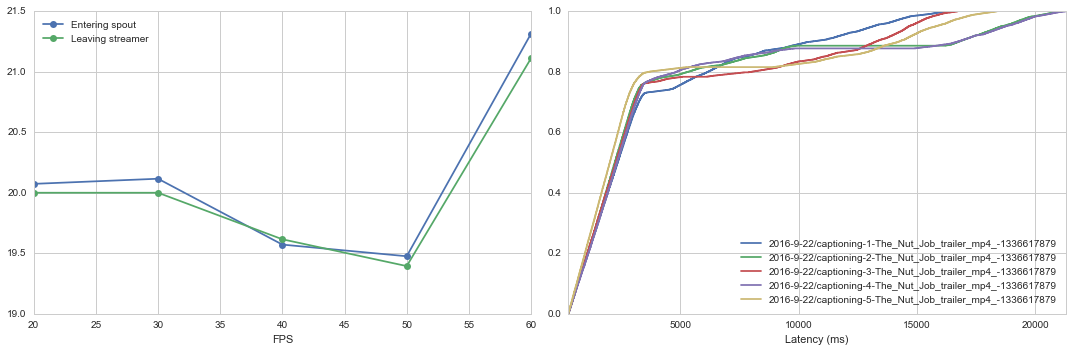

In [20]:
fig, axs = plt.subplots(ncols=2, figsize=(15,5))
cap_mul_s1.fps(points=[('Entering', 'spout'),('Leaving', 'streamer')], x=("FPS", lambda exp: int(exp.params['fps'])), ax=axs[0])
p = axs[1]
for exp in cap_mul_s1.exps:
    p = exp.cdf(stage=None, ax=p, label_format='{exp_name}-{current_stream_id}')
p.figure.canvas.set_window_title('CDF')
p.figure.tight_layout()

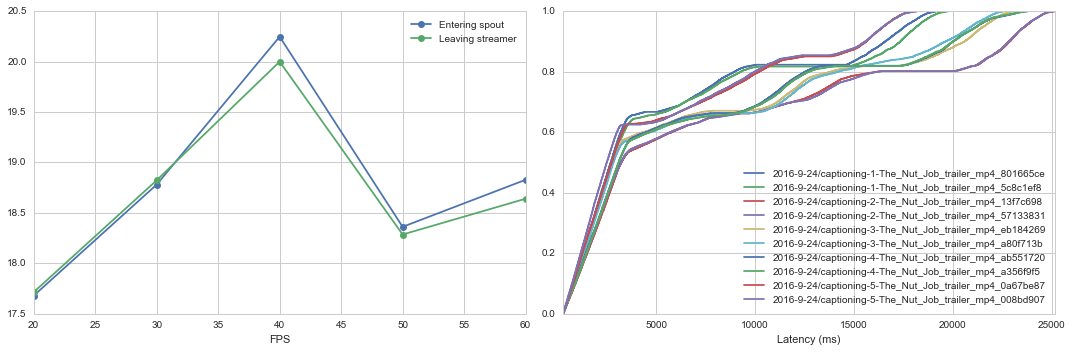

In [5]:
%%capture --no-display
ilb.reload(ana)
ana.global_perBatch = False
cap_mul_s2 = ana.cross_res(*['2016-9-24/captioning-{}'.format(idx) for idx in [1, 2, 3, 4, 5]])

fig, axs = plt.subplots(ncols=2, figsize=(15,5))
p = axs[0]
p = cap_mul_s2.fps(points=[('Entering', 'spout'),('Leaving', 'streamer')],
                   x=("FPS", lambda exp: int(exp.params['fps'])),
                   ax=p)
p.figure.canvas.set_window_title('FPS')
p.figure.tight_layout()

p = axs[1]
for exp in cap_mul_s2.exps:
    for sid in exp.streams.keys():
        exp.select_stream(sid)
        p = exp.cdf(stage=None, ax=p, label_format='{exp_name}-{current_stream_id}')
p.figure.canvas.set_window_title('CDF')
p.figure.tight_layout()

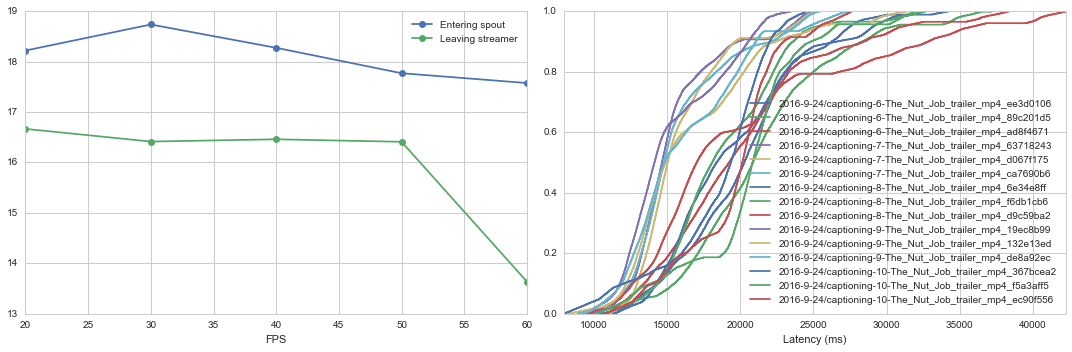

In [6]:
%%capture --no-display
ilb.reload(ana)
ana.global_perBatch = False
cap_mul_s3 = ana.cross_res(*['2016-9-24/captioning-{}'.format(idx) for idx in [6, 7, 8, 9, 10]])

fig, axs = plt.subplots(ncols=2, figsize=(15,5))
p = axs[0]
p = cap_mul_s3.fps(points=[('Entering', 'spout'),('Leaving', 'streamer')],
                   x=("FPS", lambda exp: int(exp.params['fps'])),
                   ax=p)
p.figure.canvas.set_window_title('FPS')
p.figure.tight_layout()

p = axs[1]
for exp in cap_mul_s3.exps:
    for sid in exp.streams.keys():
        exp.select_stream(sid)
        p = exp.cdf(stage=None, ax=p, label_format='{exp_name}-{current_stream_id}')
p.figure.canvas.set_window_title('CDF')
p.figure.tight_layout()

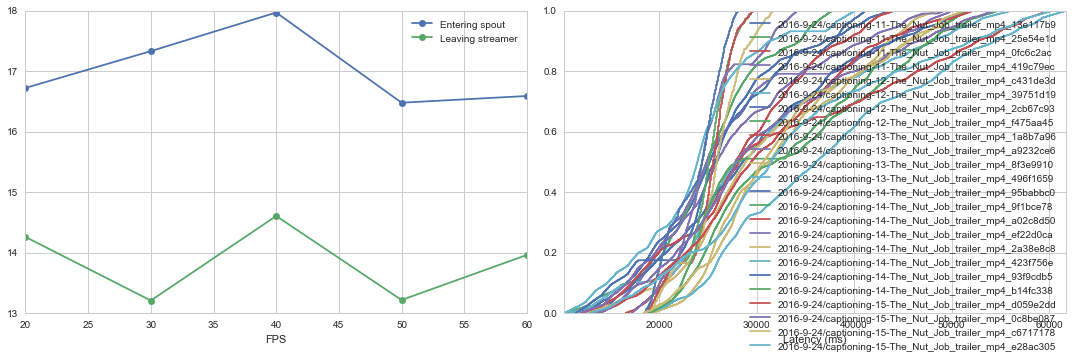

In [7]:
%%capture --no-display
ilb.reload(ana)
ana.global_perBatch = False
cap_mul_s4 = ana.cross_res(*['2016-9-24/captioning-{}'.format(idx) for idx in [11, 12, 13, 14, 15]])

fig, axs = plt.subplots(ncols=2, figsize=(15,5))
p = axs[0]
p = cap_mul_s4.fps(points=[('Entering', 'spout'),('Leaving', 'streamer')],
                   x=("FPS", lambda exp: int(exp.params['fps'])),
                   ax=p)
p.figure.canvas.set_window_title('FPS')
p.figure.tight_layout()

p = axs[1]
for exp in cap_mul_s4.exps:
    for sid in exp.streams.keys():
        exp.select_stream(sid)
        p = exp.cdf(stage=None, ax=p, label_format='{exp_name}-{current_stream_id}')
p.figure.canvas.set_window_title('CDF')
p.figure.tight_layout()

### Average on 9-22 and 9-24 exps

In [23]:
%%capture --no-display



data = []

for i in range(1, 6):
    exp = ana.exp_res('2016-9-22/captioning-{}'.format(i))
    totalStream = len(exp.streams)
    for sid in exp.streams.keys():
        exp.select_stream(sid)
        inputfps = exp.avg_fps('spout', 'Entering')[0]
        outputfps = exp.avg_fps('streamer', 'Leaving')[0]
        data.append({
                "Exp Name": exp.exp_name,
                "Total Stream": totalStream,
                "Input FPS": inputfps,
                "Output FPS": outputfps
            })

for i in range(1, 46):
    exp = ana.exp_res('2016-9-24/captioning-{}'.format(i))
    totalStream = len(exp.streams)
    for sid in exp.streams.keys():
        exp.select_stream(sid)
        inputfps = exp.avg_fps('spout', 'Entering')[0]
        outputfps = exp.avg_fps('spout', 'Entering')[0]
        data.append({
                "Exp Name": exp.exp_name,
                "Total Stream": totalStream,
                "Input FPS": inputfps,
                "Output FPS": outputfps
            })


df = pd.DataFrame(data)

INFO: log version >= 4 (after 2016-9-14), remove scale stage from topologies
Collect log from ['archive/2016-9-22/captioning-1/clarity24/6700/worker.log']


the glob pattern is archive/2016-9-22/captioning-1/clarity24/*/worker.log


Collect cpu log from archive/2016-9-22/captioning-1/clarity24/log.cpu
Auto fixed cross stage timming issues for 0 log entries
Dropped 0 frames


KeyboardInterrupt: 

### Average on 9-25 data

In [4]:
%%capture --no-display

ilb.reload(ana)

data = []

for i in range(1, 51):
    exp = ana.exp_res('2016-9-25/captioning-{}'.format(i))
    totalStream = len(exp.streams)
    for sid in exp.streams.keys():
        exp.select_stream(sid)
        inputfps = exp.avg_fps('spout', 'Entering')[0]
        outputfps = exp.avg_fps('streamer', 'Leaving')[0]
        cpu = exp.avg_cpu(rg=(75, 175))
        gpu3 = exp.avg_gpu(3, 'sm')
        gpu4 = exp.avg_gpu(4, 'sm')
        data.append({
                "Exp Name": exp.exp_name,
                "Total Stream": totalStream,
                "Input FPS": inputfps,
                "Output FPS": outputfps,
                "CPU": cpu,
                "GPU0": gpu3,
                "GPU1": gpu4
            })

df = pd.DataFrame(data)
finalRes = df.groupby('Total Stream').agg([np.mean, np.std])

In [6]:
finalRes

CPU                 GPU0               GPU1            \
                   mean       std       mean       std     mean       std   
Total Stream                                                                
1             15.722499  0.466179   5.785195  1.025320  0.00000  0.000000   
2             23.896415  0.165381  14.062697  1.278837  0.00000  0.000000   
3             31.579465  0.174613  15.051102  0.816613  0.00101  0.002091   
4             38.508520  0.296291  15.287417  0.800203  0.00000  0.000000   
5             44.570684  0.515850  13.299480  0.682950  0.00000  0.000000   
6             49.610653  2.145836   8.375677  3.846923  0.00000  0.000000   
7             55.514744  0.412898   9.762930  1.150148  0.00000  0.000000   
8             58.049218  0.588454  10.295908  1.442957  0.00000  0.000000   
9             61.296317  0.518098  10.078120  0.697788  0.00000  0.000000   
10            62.612304  1.136487   5.651377  3.704630  0.00000  0.000000   

              Input FPS           Output FPS            
                   mean       std       mean       std  
Total Stream                                            
1             18.024333  0.433141  17.814517  0.493074  
2             15.420869  0.813718  15.157114  0.770075  
3             15.116189  1.232290  11.251665  2.390326  
4             14.569821  1.149835   8.052217  4.489151  
5             12.439502  0.891412   5.444861  4.135295  
6             11.055629  0.855876   2.762518  2.966001  
7              8.898619  0.468067   2.838297  2.883028  
8              8.032835  0.444848   2.448129  2.450132  
9              7.289370  0.372734   1.863659  2.463428  
10             6.832888  0.509460   0.869072  1.614598

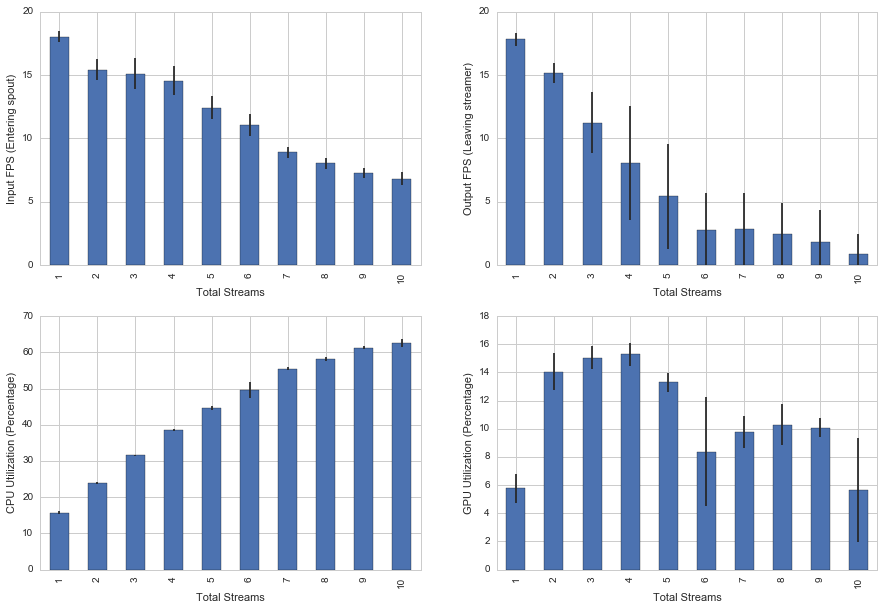

In [39]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
col_name = 'Input FPS'
p = finalRes[col_name]['mean'].plot.bar(yerr=finalRes[col_name]['std'], ax=axs[0][0])
p.set_xlabel('Total Streams')
p.set_ylabel('Input FPS (Entering spout)')


col_name = 'Output FPS'
p = finalRes[col_name]['mean'].plot.bar(yerr=finalRes[col_name]['std'], ax=axs[0][1])
p.set_xlabel('Total Streams')
p.set_ylabel('Output FPS (Leaving streamer)')
p.set_ylim([0, 20])

 
#fig, axs = plt.subplots(ncols=2, figsize=(15,5))
col_name = 'CPU'
p = finalRes[col_name]['mean'].plot.bar(yerr=finalRes[col_name]['std'], ax=axs[1][0])
p.set_xlabel('Total Streams')
p.set_ylabel('CPU Utilization (Percentage)')

col_name = 'GPU0'
p = finalRes[col_name]['mean'].plot.bar(yerr=finalRes[col_name]['std'], ax=axs[1][1])
p.set_xlabel('Total Streams')
p.set_ylabel('GPU Utilization (Percentage)')

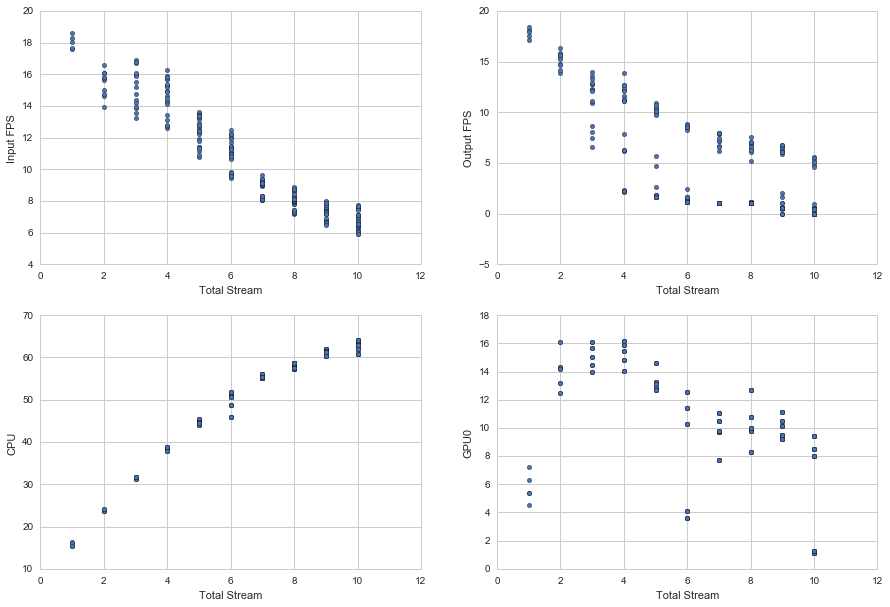

In [41]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

df.plot.scatter(x='Total Stream', y='Input FPS', ax=axs[0][0])
df.plot.scatter(x='Total Stream', y='Output FPS', ax=axs[0][1])

df.plot.scatter(x='Total Stream', y='CPU', ax=axs[1][0])
df.plot.scatter(x='Total Stream', y='GPU0', ax=axs[1][1])